In [1]:
import pandas as pd

df=pd.read_csv("3.11.1.csv")
df

,fuerza del brazo (x),Levantamiento dinámico (y)
0,17.3,71.7
1,19.3,48.3
2,19.5,88.3
3,19.7,75.0
4,22.9,91.7
5,23.1,100.0
6,26.4,73.3
7,26.8,65.0
8,27.6,75.0
9,28.1,88.3


In [2]:
df.describe()

,fuerza del brazo (x),Levantamiento dinámico (y)
count,25.000000,25.000000
mean,31.148000,82.000000
std,9.867207,14.129549
min,17.300000,48.300000
25%,26.400000,71.700000
50%,29.000000,85.000000
75%,36.000000,91.700000
max,55.900000,100.000000


In [5]:
import numpy as np

def calculate_b1(x: list, y:list):
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x = (np.array(x) - x_mean)
    y = (np.array(y) - y_mean)
    
    numerator = np.inner(x,y)
    denominator = np.inner(x,x)

    return numerator/denominator
        
def calculate_b0(x: list, y:list, b1:float):
    
    numerator = np.sum(y)-b1*np.sum(x)
    denominator = len(x)

    return numerator/denominator

In [6]:
b1 = calculate_b1(x=df["fuerza del brazo (x)"],y=df["Levantamiento dinámico (y)"])
b1

0.5608977925284157

In [7]:
b0 = calculate_b0(x=df["fuerza del brazo (x)"],y=df["Levantamiento dinámico (y)"],b1=b1)
b0

64.52915555832492

Por lo tanto

$$ \mu_{\gamma | x} = \beta_{0} + \beta_{1}  x = 64.5 + 0.56 x$$

In [8]:
b0 + b1 *30

81.35608933417738

$$\mu_{\gamma | 30}=81.35$$

In [10]:
# Vamos a hacerlo de la manera más moderna posible utilizando Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X_train = np.array(df["fuerza del brazo (x)"]).reshape(-1, 1)
y_train = np.array(df["Levantamiento dinámico (y)"])
 
# Creamos el objeto de Regresión Linear
model = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
model.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
predictions = model.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, predictions))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, predictions))

Coefficients: 
 [0.56089779]
Independent term: 
 64.52915555832492
Mean squared error: 162.25
Variance score: 0.15


Text(0.5, 1.0, 'Residual plot')

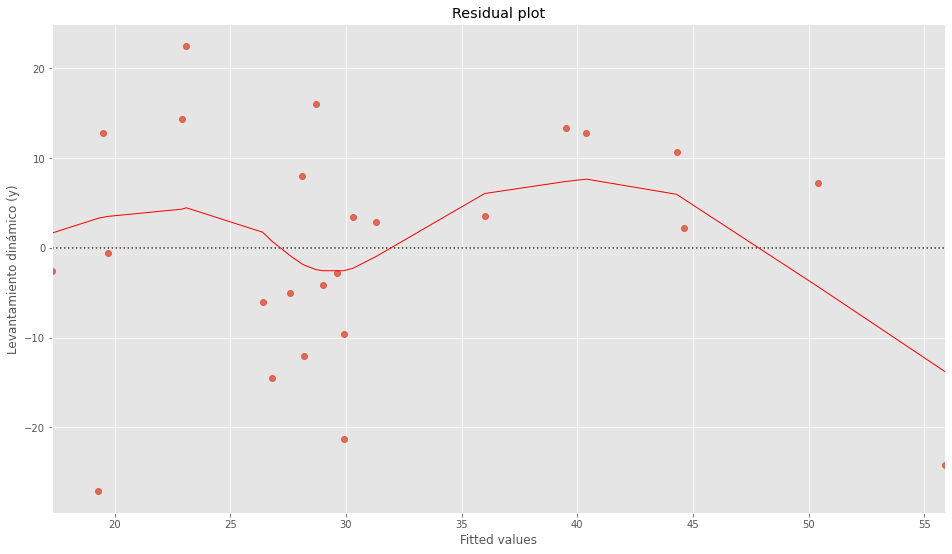

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


sns.residplot('fuerza del brazo (x)', "Levantamiento dinámico (y)",data=df,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')


# 11.8 

Se aplica un examen de colocación de matemá- ticas a todos los estudiantes de nuevo ingreso en una universidad pequeña. Se negará la inscripción al curso regular de matemáticas a los estudiantes que obtengan menos de 35 puntos y se les enviará a clases de regula- rización. Se registraron los resultados del examen de colocación y las caliicaciones inales de 20 estudiantes que tomaron el curso regular:

In [19]:
df=pd.read_csv("3.11.8.csv")
df

,Examen de colocación,Calificación en el curso
0,50,53
1,35,41
2,35,61
3,40,56
4,55,68
5,65,36
6,35,11
7,60,70
8,90,79
9,35,59


#### a) Elabore un diagrama de dispersión.

#### b) Calcule la ecuación de la recta de regresión para predecir las caliicaciones en el curso a partir de las del examen de colocación.

#### c) Grafique la recta en el diagrama de dispersión

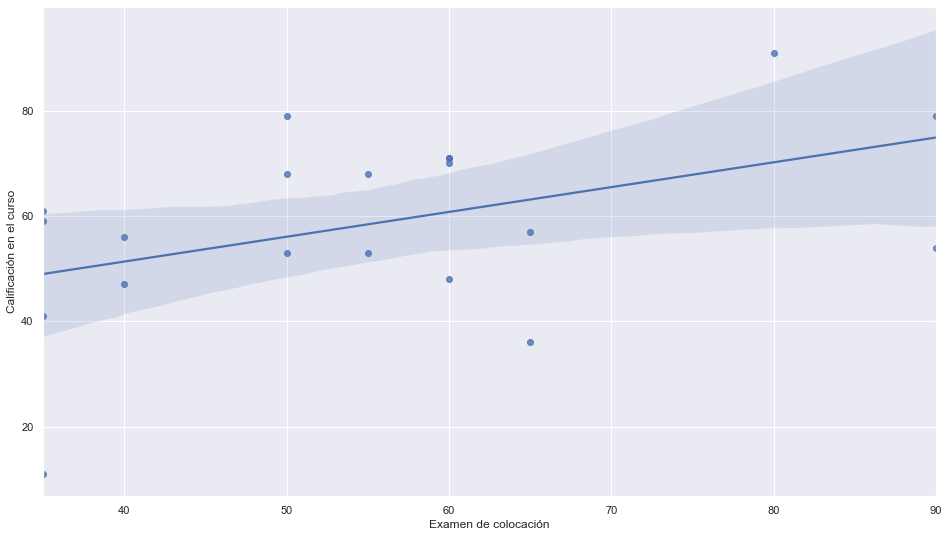

In [20]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x="Examen de colocación", y="Calificación en el curso", data=df)

In [21]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X_train = np.array(df["Examen de colocación"]).reshape(-1, 1)
y_train = np.array(df["Calificación en el curso"])
 
# Creamos el objeto de Regresión Linear
model = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
model.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
predictions = model.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, predictions))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, predictions))

Coefficients: 
 [0.4710646]
Independent term: 
 32.505914467697906
Mean squared error: 235.46
Variance score: 0.21


d) Si la caliicación aprobatoria mínima fuera 60 puntos, ¿qué caliicación en el examen de coloca- ción se debería usar en el futuro como criterio para negar a los estudiantes el derecho de admisión a ese curso?

$$ \mu_{\gamma | x} = \beta_{0} + \beta_{1}  x = 32.5 + 0.47 x = 60$$

Entonces 

$$ x \approx 58$$

Por lo tanto solo se debe admitir alumnos que obtengan por lo menos 58 puntos

Text(0.5, 1.0, 'Residual plot')

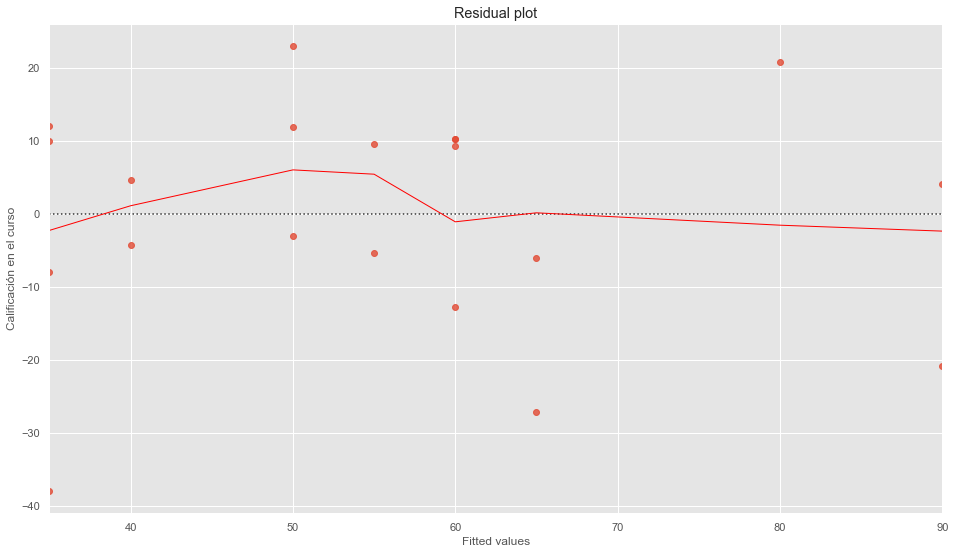

In [25]:
sns.residplot('Examen de colocación', "Calificación en el curso",data=df,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')


# 11.37


En los pesticidas se utilizan compuestos de or- ganofosfatos (OF). Sin embargo, es importante estudiar el efecto que tienen sobre las especies expuestas a ellos. Como parte del estudio de laboratorio Some Effects of Organophosphate Pesticides on Wildlife Spe- cies, elaborado por el Departamento de Pesca y Vida Silvestre de Virginia Tech, se realizó un experimento en el cual se suministraron distintas dosis de un pesticida de OF especíico a 5 grupos de 5 ratones (peromysius leucopus). Los 25 ratones eran hembras de edad y con- diciones similares. Un grupo no recibió el producto. La respuesta básica y consistió en medir la actividad cere- bral. Se postuló que dicha actividad disminuiría con un incremento en la dosis de OF. A continuación se pre- sentan los datos:

In [41]:
df=pd.read_csv("3.11.37.csv")
df

,"Dosis, x (mg/kg de peso corporal)","Actividad, y (moles/litro/min)"
0,0.0,10.9
1,0.0,10.6
2,0.0,10.8
3,0.0,9.8
4,0.0,9.0
5,2.3,11.0
6,2.3,11.3
7,2.3,9.9
8,2.3,9.2
9,2.3,10.1


In [42]:
df.columns.values

array(['Dosis, x (mg/kg de peso corporal)',
       'Actividad, y (moles/litro/min)'], dtype=object)

In [43]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X_train = np.array(df["Dosis, x (mg/kg de peso corporal)"]).reshape(-1, 1)
y_train = np.array(df["Actividad, y (moles/litro/min)"])
 
# Creamos el objeto de Regresión Linear
model = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
model.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
predictions = model.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, predictions))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, predictions))

Coefficients: 
 [-0.34369565]
Independent term: 
 10.811499999999999
Mean squared error: 2.95
Variance score: 0.63


Con lo cual obtenemos 

$$\beta_0 = 10.8$$


$$\beta_1 = -0.34$$

 https://jekel.me/2017/Lack-of-fit-test-linear-regression/